In [1]:
#Installing necessary libraries

In [2]:
#Importing required libraries

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import sklearn
%matplotlib inline
# import statsmodel
import plotly.express as px

### Exploratory Data Analysis

In [4]:
data = pd.read_csv("teleco.csv")

In [5]:
data.shape

(7043, 21)

In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Data Cleaning

In [8]:
data['TotalCharges'] = data['TotalCharges'].apply(lambda x: np.nan if x == ' ' else x).apply(lambda x: float(x))

In [9]:
data = data.dropna()

In [10]:
datay = data[data.Churn == 'Yes']
datan = data[data.Churn == 'No']

## Lets look at the demographic features

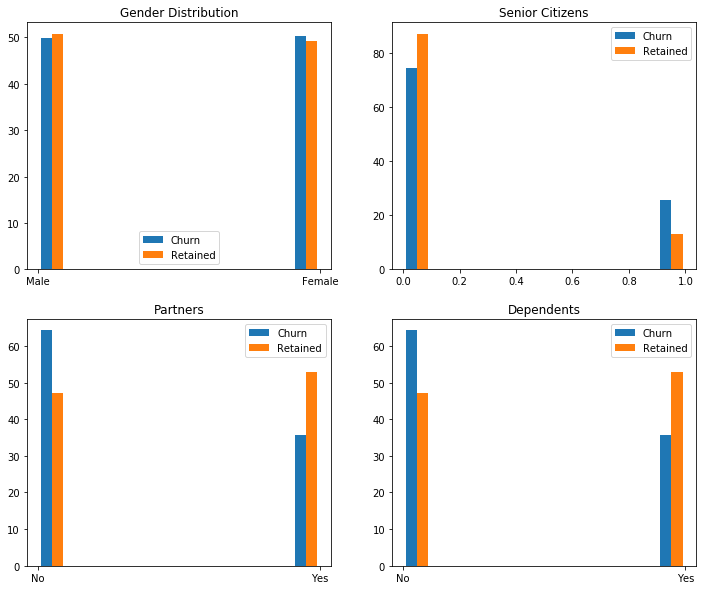

In [11]:
import seaborn as sns

# plt.hist([x, y], color=['r','b'], alpha=0.5)
# plt.figure(figsize = (12, 12))
fig, axs = plt.subplots(2, 2, figsize = (12, 10))
# fig.figsize(20, 20)
axs[0, 0].hist([datay.gender, datan.gender], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[0, 0].set_title('Gender Distribution')

axs[0, 1].hist([datay.SeniorCitizen, datan.SeniorCitizen], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[0, 1].set_title('Senior Citizens')

axs[1, 0].hist([datay.Partner, datan.Partner], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[1, 0].set_title('Partners')

axs[1, 1].hist([datay.Partner, datan.Partner], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[1, 1].set_title('Dependents')

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

plt.show()


### Inferences and Possible Hypothesis
1. The chance of churning seems to be higher for Senior Citizens, though not significantly.
2. Customers having partners and dependents(some semblance of a family) have lower chance of churn.

Text(0.5, 1.0, 'Customers vs Tenure')

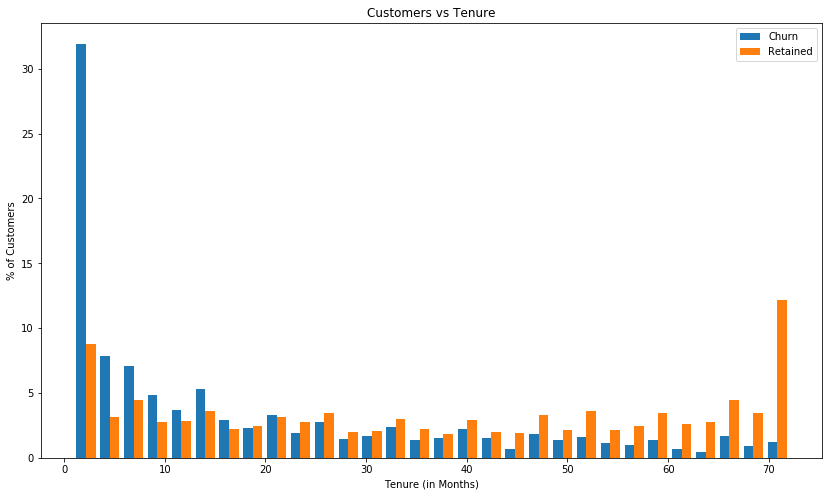

In [12]:
plt.figure(figsize = (14,8))
# plt.bar([i[0] for i in enumerate(data.tenure.value_counts())], [i[1] for i in enumerate(data.tenure.value_counts())])
plt.hist([datay.tenure, datan.tenure], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'], bins = 30)
plt.legend()
plt.xlabel("Tenure (in Months)")
plt.ylabel("% of Customers")
plt.title("Customers vs Tenure")

### Hypothesis:
1. A lot of customers seem to have the telecom service for a very few months(even zero). A very high percentage of the churned customers seem to leave after only one month. It could be possible that people simply buy a telecom plan and then leave the service after a month of use without paying the bill!

### Services Enrolled

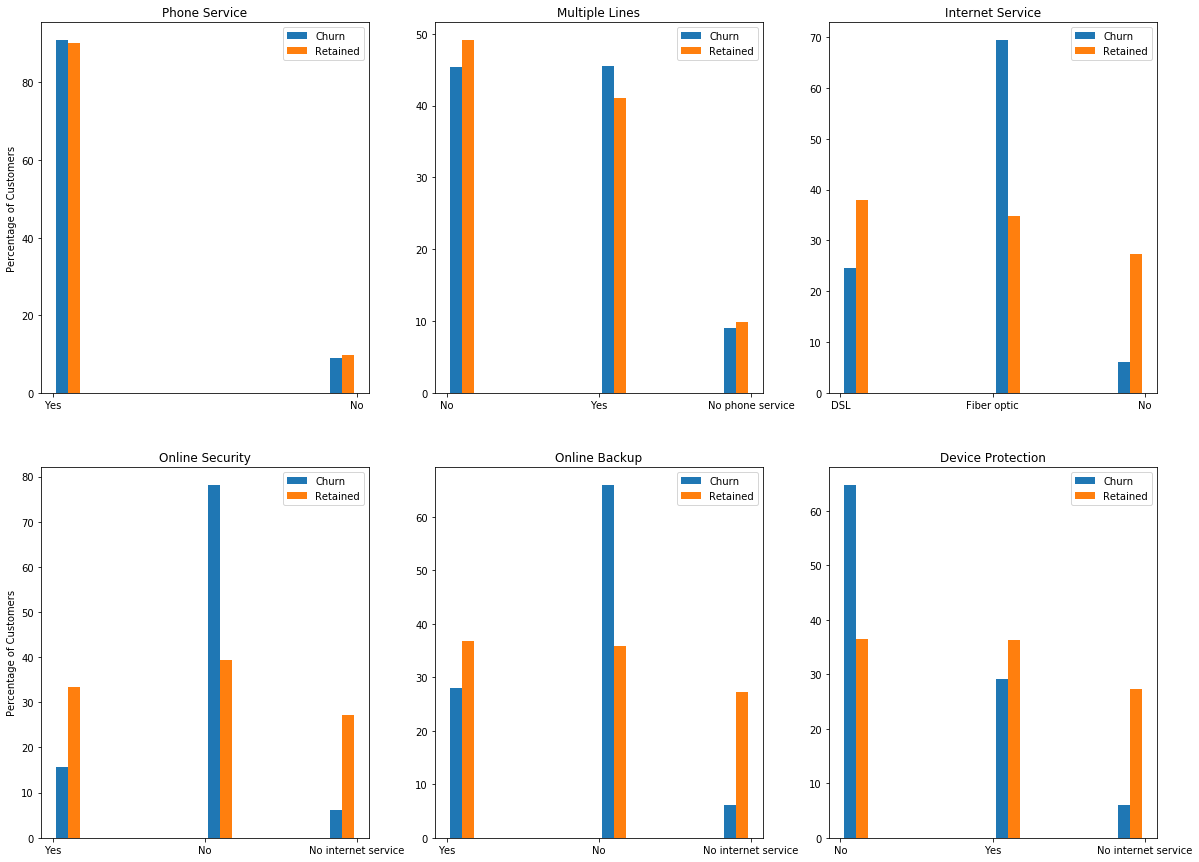

In [13]:
# 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'
fig, axs = plt.subplots(2, 3, figsize = (20, 15))
# fig.figsize(20, 20)
axs[0, 0].hist([datay.PhoneService, datan.PhoneService], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[0, 0].set_title('Phone Service')
axs[0,0].set_ylabel('Percentage of Customers')

axs[0, 1].hist([datay.MultipleLines, datan.MultipleLines], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[0, 1].set_title('Multiple Lines')

axs[0, 2].hist([datay.InternetService, datan.InternetService], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[0, 2].set_title('Internet Service')

axs[1, 0].hist([datay.OnlineSecurity, datan.OnlineSecurity], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[1, 0].set_title('Online Security')
axs[1,0].set_ylabel('Percentage of Customers')

axs[1, 1].hist([datay.OnlineBackup, datan.OnlineBackup], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[1, 1].set_title('Online Backup')

axs[1, 2].hist([datay.DeviceProtection, datan.DeviceProtection], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[1, 2].set_title('Device Protection')

axs[0,0].legend()
axs[0,1].legend()
axs[0,2].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[1,2].legend()

plt.show()

### Inference / Hypothesis:

1. Customers without an Internet Service surprisingly have a higher retention rate.
2. Customers using Fiber Optic Internet connections seem to have a very high churn rate, which is concerning since it is a newer technology than the DSL.
3. A large percentage of customers that left had not Online Security or Online Backup or Device Protection.


### Viewing Habits

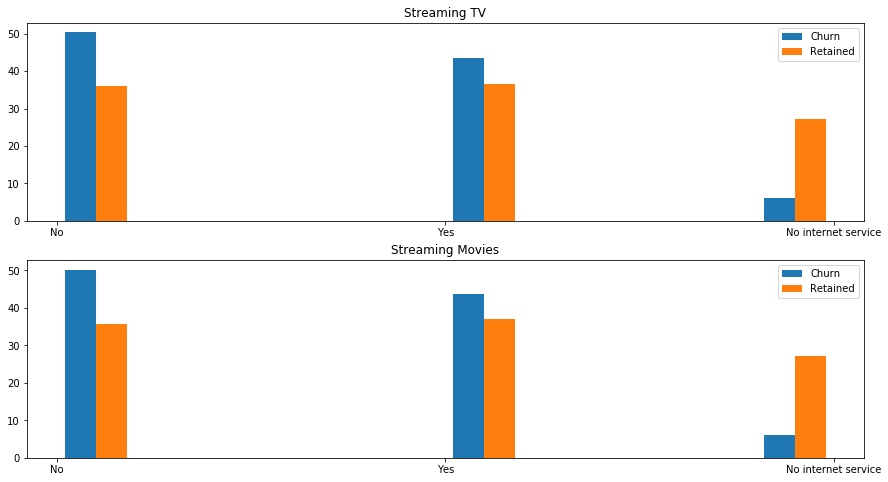

In [14]:
fig, axs = plt.subplots(2, figsize = (15, 8))
# 'StreamingTV', 'StreamingMovies'
axs[0].hist([datay.StreamingTV, datan.StreamingTV], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[0].set_title('Streaming TV')

axs[1].hist([datay.StreamingMovies, datan.StreamingMovies], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[1].set_title('Streaming Movies')
axs[0].legend()
axs[1].legend()
plt.show()

### Payment Habits

No handles with labels found to put in legend.


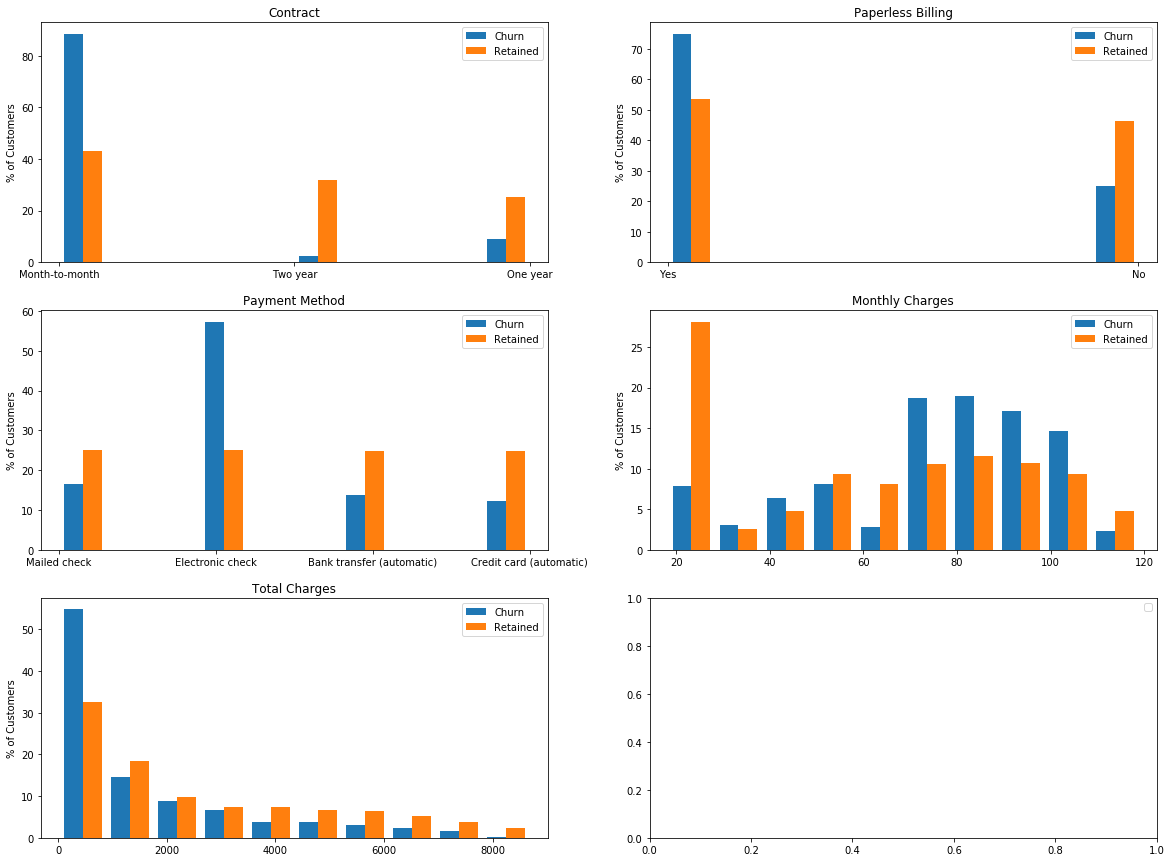

In [15]:
#'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'

fig, axs = plt.subplots(3, 2, figsize = (20, 15))
# fig.figsize(20, 20)
axs[0, 0].hist([datay.Contract, datan.Contract], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'], color = ['tab:blue', 'tab:orange'])
axs[0,0].set_ylabel("% of Customers")
axs[0, 0].set_title('Contract')

axs[0, 1].hist([datay.PaperlessBilling, datan.PaperlessBilling], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[0,1].set_ylabel("% of Customers")
axs[0, 1].set_title('Paperless Billing')

axs[1, 0].hist([datay.PaymentMethod, datan.PaymentMethod], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[1,0].set_ylabel("% of Customers")
axs[1, 0].set_title('Payment Method')

axs[1, 1].hist([datay.MonthlyCharges, datan.MonthlyCharges], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[1,1].set_ylabel("% of Customers")
axs[1, 1].set_title('Monthly Charges')

axs[2, 0].hist([datay.TotalCharges, datan.TotalCharges], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[2,0].set_ylabel("% of Customers")
axs[2, 0].set_title('Total Charges')

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[2,1].legend()
axs[2,0].legend()
# axs[2,2].legend()

plt.show()

### Inference / Hypothesis:
1. Total Charges are 0 for a very high percentage of Churn customers, reinforcing the earlier hypothesis that a lot of customers simply register for a month and leave the service without paying a bill.
2. Surprisingly, of the retained customers, a very high percentage are low monthly charge customers. 
3. A large percentage of the churn customers are high paying, high monthly charge customers.
4. Electronic check customers have a higher chance of churning.
5. Customers on a month - to - month contract are more likely to churn.
6. Cusomers who use paperless billing are more likely to change.

## Timing Model using Weibull Distribution

In [16]:
from statsmodels.base.model import GenericLikelihoodModel
import scipy.stats as spst

#### We assume that all customers will eventually churn. 
#### All customers that have not churned in the observed period are assumed to have been censored!

# We start with a simple Weibull timing to understand to get an intial estimate of the gamma values.

In [19]:
class Weibull_C(GenericLikelihoodModel):
    def loglike(self, params):
        y=self.endog
        censored=self.exog
        censored=censored.squeeze()
        
        c,lmbda=np.exp(params)
        Ft=spst.weibull_min.cdf(y,c=c, scale=1/lmbda)
        Ft_m1=spst.weibull_min.cdf(y-1,c=c, scale=1/lmbda)
        likelihood= (1-censored)*(Ft-Ft_m1)   + censored*(1-Ft)
        loglikelihood=np.log(likelihood)
        return np.sum(loglikelihood)


Model=Weibull_C(data["tenure"],pd.get_dummies(data["Churn"])["No"].values).fit(start_params=-np.random.rand(2),method="bfgs",xtol=0.00000000000001)
# Model.summary(xname=["Deductible","Premium","Income_o2","Const_o2","Income_o3","Const_o3","Income_o4","Const_o4","Income_o5","Const_o5"]))
print(Model.summary(xname=["c", "lambda"]))

Optimization terminated successfully.
         Current function value: 1.466105
         Iterations: 18
         Function evaluations: 23
         Gradient evaluations: 23
                              Weibull_C Results                               
Dep. Variable:                 tenure   Log-Likelihood:                -10310.
Model:                      Weibull_C   AIC:                         2.062e+04
Method:            Maximum Likelihood   BIC:                         2.063e+04
Date:                Tue, 01 Sep 2020                                         
Time:                        13:00:56                                         
No. Observations:                7032                                         
Df Residuals:                    7031                                         
Df Model:                           0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [20]:
c=np.exp(Model.params[0])
lmbda=np.exp(Model.params[1])
print("C for Weibull model without heterogenity is = ", c)
print("Lambda for Weibull model without heterogenity is = ", lmbda)

C for Weibull model without heterogenity is =  0.5177125160017906
Lambda for Weibull model without heterogenity is =  0.0029681257512303902


Text(0, 0.5, 'Probability of Churn')

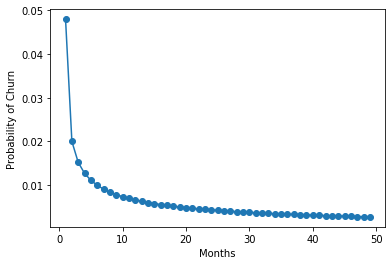

In [21]:
#probability of relapsing in each period

y=np.arange(1,50)
c=np.exp(Model.params[0])
lmbda=np.exp(Model.params[1])

Ft=spst.weibull_min.cdf(y,c,scale=1/lmbda)
Ft_m1=spst.weibull_min.cdf(y-1,c,scale=1/lmbda)
likelihood1=Ft-Ft_m1
plt.plot(y,likelihood1,marker="o")
plt.xlabel("Months")
plt.ylabel("Probability of Churn")

Text(0, 0.5, 'Hazard')

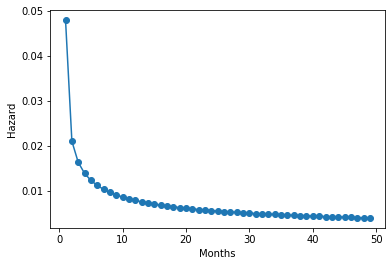

In [22]:
#compute hazard
hazard= (Ft-Ft_m1)/(1-Ft_m1)
plt.plot(y,hazard,marker="o")
plt.xlabel("Months")
plt.ylabel("Hazard")

The value of C for the above estimated model is lesser than 1, indicating that hazard decreases with time.
This did not make sense intiutively as we expect hazard of customer to leave the service should increase with increasing time. We therefore tried out a two-segment model.

#### Two Segment Weibull Model

In [23]:
class Weibull_2C(GenericLikelihoodModel):
    def loglike(self, params):
        y=self.endog
        censored=self.exog
        #fill in
        censored=censored.squeeze()
        c,lmbda1, lmbda2,p=np.exp(params)
        #p =np.exp(beta)/(1+np.exp(beta))
        p=p/(1+p)
        Ft1=spst.weibull_min.cdf(y, c=c,scale=1/lmbda1)
        Ft1_m1=spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda1)   
        Ft2=spst.weibull_min.cdf(y, c=c,scale=1/lmbda2)
        Ft2_m1=spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda2)
        
        #likeliho0d for seg1
        likelihood1=(1-censored)*(Ft1-Ft1_m1)+censored*(1-Ft1)
        
        #likelihood for seg 2
        likelihood2=(1-censored)*(Ft2-Ft2_m1)+censored*(1-Ft2)
        
        # assemble
        likelihood=likelihood1*p+likelihood2*(1-p)
  
        loglikelihood=np.log(likelihood)
        return np.sum(loglikelihood)
    
Model=Weibull_2C(data["tenure"] +1,pd.get_dummies(data["Churn"])["No"].values).fit(start_params= -np.random.rand(4),method="bfgs",xtol=0.00000000000001)
print(Model.summary(xname=["c", "lambda1", "lambda2", "prolty"]))

Optimization terminated successfully.
         Current function value: 1.498446
         Iterations: 43
         Function evaluations: 55
         Gradient evaluations: 55
                              Weibull_2C Results                              
Dep. Variable:                 tenure   Log-Likelihood:                -10537.
Model:                     Weibull_2C   AIC:                         2.108e+04
Method:            Maximum Likelihood   BIC:                         2.108e+04
Date:                Tue, 01 Sep 2020                                         
Time:                        13:01:05                                         
No. Observations:                7032                                         
Df Residuals:                    7031                                         
Df Model:                           0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

C for Weibull model without heterogenity is =  1.3208843310055969
Lambda for Weibull model without heterogenity is =  0.23025865278039476
Lambda for Weibull model without heterogenity is =  0.006502621546227393
Probability for a customer to belong to segment 1 =  0.12464259982603844


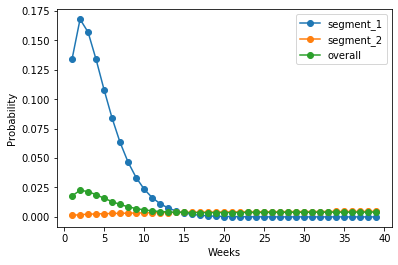

In [29]:
params=Model.params
c,lmbda1, lmbda2,p=np.exp(params)
#p =np.exp(beta)/(1+np.exp(beta))
p=p/(1+p)

y=np.arange(1,40)
Ft1=spst.weibull_min.cdf(y, c=c,scale=1/lmbda1)
Ft1_m1=spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda1)   
Ft2=spst.weibull_min.cdf(y, c=c,scale=1/lmbda2)
Ft2_m1=spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda2)
 
    
#segment 1: 
plt.plot(y,Ft1-Ft1_m1,marker="o", label = "segment_1")
plt.plot(y,Ft2-Ft2_m1,marker="o", label = "segment_2")
plt.plot(y,(Ft1-Ft1_m1)*p+(Ft2-Ft2_m1)*(1-p),marker="o", label = "overall")
plt.xlabel("Weeks")
plt.ylabel("Probability")
plt.legend()
print("C for Weibull model without heterogenity is = ", c)
print("Lambda for Weibull model without heterogenity is = ", lmbda1)
print("Lambda for Weibull model without heterogenity is = ", lmbda2)
print("Probability for a customer to belong to segment 1 = ", p)

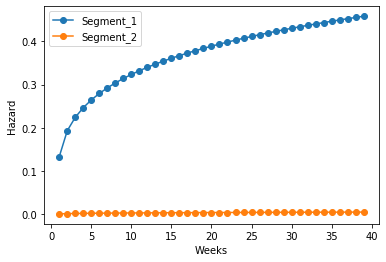

In [30]:
plt.plot(y,(Ft1-Ft1_m1)/(1-Ft1_m1),marker="o", label = "Segment_1")
plt.plot(y,(Ft2-Ft2_m1)/(1-Ft2_m1),marker="o", label = "Segment_2")
plt.xlabel("Weeks")
plt.ylabel("Hazard")
plt.legend()
plt.show()

#### Posterior Analysis

#### For a new application, what is the probability this application belongs to segment 1

In [19]:
p

0.12463429771128652

#### Based on the model estimation result, if there are 7000 customers, how many of them will churn within 1 month, 2 months, 3 months...?

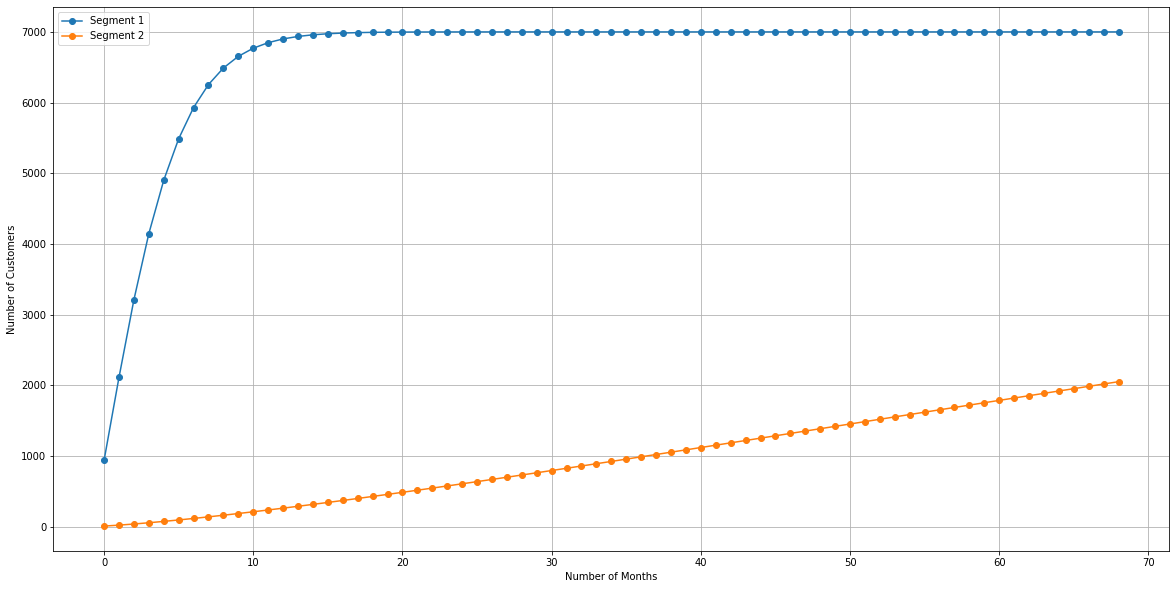

In [21]:
params=Model2.params
c,lmbda1, lmbda2,p=np.exp(params)
#p =np.exp(beta)/(1+np.exp(beta))
p=p/(1+p)

y=np.arange(1,70)
Ft1=spst.weibull_min.cdf(y, c=c,scale=1/lmbda1)
Ft1_m1=spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda1)   
Ft2=spst.weibull_min.cdf(y, c=c,scale=1/lmbda2)
Ft2_m1=spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda2)


# print("Based on the model estimation result, if there are 7000 customers in segment one, how many of them will churn within 1 month, 2 months, 3 months...? ", np.cumsum(7000*(Ft1-Ft1_m1)))
# print("Based on the model estimation result, if there are 7000 customers in segment two, how many of them will churn within 1 month, 2 months, 3 months...? ", np.cumsum(7000*(Ft2-Ft2_m1)))
lis_1 = np.cumsum(7000*(Ft1-Ft1_m1)).tolist()
lis_2 = np.cumsum(7000*(Ft2-Ft2_m1)).tolist()
plt.figure(figsize=(20,10))
plt.grid()
plt.plot([i for i in range(len(lis_1))],lis_1,marker= "o", label= 'Segment 1')
plt.xlabel("Number of Months")
plt.ylabel("Number of Customers")
plt.plot([i for i in range(len(lis_2))],lis_2,marker= "o", label = "Segment 2")
plt.xlabel("Number of Months")
plt.ylabel("Number of Customers")
plt.legend()




#### Based on the model estimation result, if a customer is still with the company after 4 months, what is the probability for this cusomer to churn in month 5, 6, 7...?

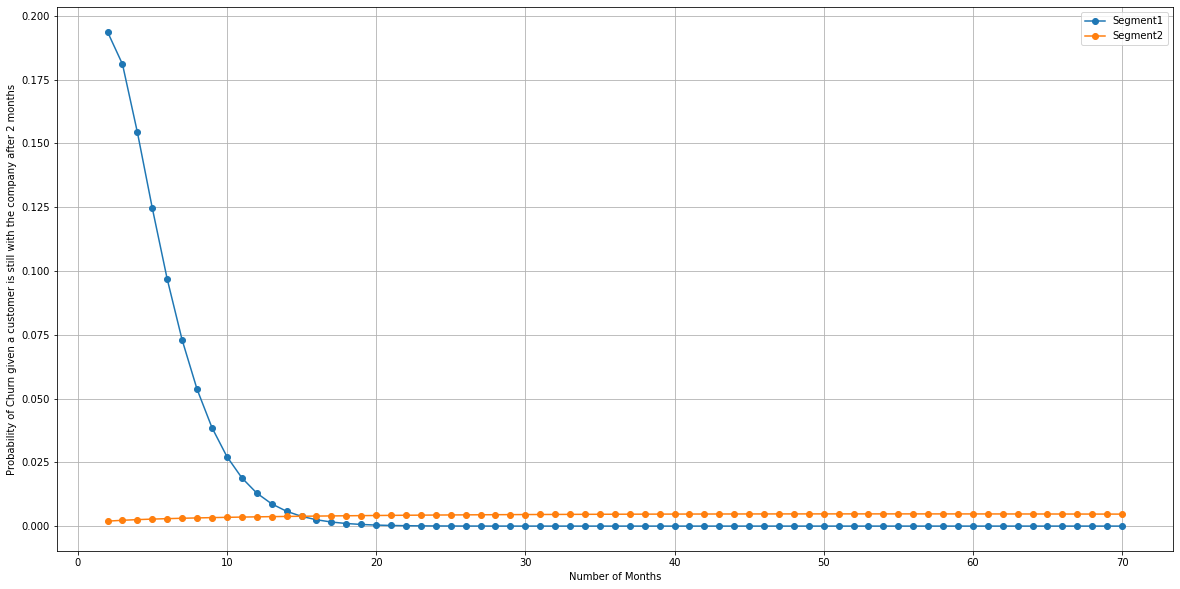

In [38]:
def churn_months(s,e):

    params=Model2.params
    c,lmbda1, lmbda2,p=np.exp(params)
    p=p/(1+p)

    y=np.arange(s,e)
    Ft1=spst.weibull_min.cdf(y, c=c,scale=1/lmbda1)
    Ft1_m1=spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda1)   
    Ft2=spst.weibull_min.cdf(y, c=c,scale=1/lmbda2)
    Ft2_m1=spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda2)
    
    prb1 = (Ft1-Ft1_m1)/(1-Ft1_m1[0]).tolist()
    prb2 = (Ft2-Ft2_m1)/(1-Ft2_m1[0]).tolist()
    
    xs = [i for i in range(s,e)]
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(xs,prb1,marker= "o", label = "Segment1")
    plt.xlabel("Number of Months")
    plt.ylabel(f"Probability of Churn given a customer is still with the company after {s} months")
    plt.plot(xs,prb2,marker= "o", label = "Segment2")
    plt.legend()
    
churn_months(2,71)

## Customer Insights using the Weibull Model

In [26]:
# x1 = (data["gender"].values == "Male")*1
x2 = (data["SeniorCitizen"].values == 1)*1
x3 = (data["Partner"].values == "Yes")*1
x4 = (data["Dependents"].values == "Yes")*1
# x5 = (data["PhoneService"].values == "Yes")*1
# x6 = (data["MultipleLines"].values == "Yes")*1

# x7 = pd.get_dummies(data["InternetService"])["DSL"].values
# x8 = pd.get_dummies(data["InternetService"])["Fiber optic"].values
# x9 = pd.get_dummies(data["InternetService"])["No"].values

x10 = (data["OnlineSecurity"].values == "Yes")*1
x11 = (data["OnlineBackup"].values == "Yes")*1
x12 = (data["DeviceProtection"].values == "Yes")*1
x13 = (data["TechSupport"].values == "Yes")*1
x14 = (data["StreamingTV"].values == "Yes")*1
x15 = (data["StreamingMovies"].values == "Yes")*1

# x16 = pd.get_dummies(data.Contract)["Month-to-month"].values
# x17 = pd.get_dummies(data.Contract)["One year"].values
# x18 = pd.get_dummies(data.Contract)["Two year"].values

# x19 = (data["PaperlessBilling"].values == "Yes")*1

x20 = pd.get_dummies(data.PaymentMethod)["Electronic check"].values
x21 = pd.get_dummies(data.PaymentMethod)["Mailed check"].values
x22 = pd.get_dummies(data.PaymentMethod)["Bank transfer (automatic)"].values
x23 = pd.get_dummies(data.PaymentMethod)["Credit card (automatic)"].values
x24 = data.MonthlyCharges.values
x25 = data.TotalCharges.values

# x1 = np.expand_dims(x1, axis=1)
x2 = np.expand_dims(x2, axis=1)
x3 = np.expand_dims(x3, axis=1)
x4 = np.expand_dims(x4, axis=1)
# x5 = np.expand_dims(x5, axis=1)
# x6 = np.expand_dims(x6, axis=1)
# x7 = np.expand_dims(x7, axis=1)
# x8 = np.expand_dims(x8, axis=1)
# x9 = np.expand_dims(x9, axis=1)
x10 = np.expand_dims(x10, axis=1)
x11 = np.expand_dims(x11, axis=1)
x12 = np.expand_dims(x12, axis=1)
x13 = np.expand_dims(x13, axis=1)
x14 = np.expand_dims(x14, axis=1)
x15 = np.expand_dims(x15, axis=1)
# x16 = np.expand_dims(x16, axis=1)
# x17 = np.expand_dims(x17, axis=1)
# x18 = np.expand_dims(x18, axis=1)
# x19=np.expand_dims(x19, axis=1)
# x20=np.expand_dims(x20, axis=1)
# x21=np.expand_dims(x21, axis=1)
# x22=np.expand_dims(x22, axis=1)
# x23=np.expand_dims(x23, axis=1)
# x24=np.expand_dims(x24, axis=1)
# x25=np.expand_dims(x25, axis=1)

cens = (data["Churn"].values == "Yes")*1
censored = np.expand_dims(cens,axis=1)
X = np.concatenate((censored,x2, x3, x4, x10, x11, x12, x13, x14, x15),axis=1)

In [27]:
#[7 points] Estimating the model correctly
class Weibull_2C(GenericLikelihoodModel):
    def loglike(self, params):
        y=self.endog
        x=self.exog
        
        censored=x[:,0]
        x=x[:,1:]
        beta=params[0:9]
        c1,lmbda1,lmbda2 =np.exp(params[9:12])
        
        exp=np.exp(params[12] + np.dot(beta,x.T))
        
        p=exp/(1+exp)

        Ft1=spst.weibull_min.cdf(y,c=c1, scale=1/lmbda1)
        Ft1_m1=spst.weibull_min.cdf(y-1,c=c1, scale=1/lmbda1)
        Ft2=spst.weibull_min.cdf(y,c=1, scale=1/lmbda2)
        Ft2_m1=spst.weibull_min.cdf(y-1,c=1, scale=1/lmbda2)
        likelihood1= (1-censored)*(Ft1-Ft1_m1) + censored*(1-Ft1)
        likelihood2= (1-censored)*(Ft2-Ft2_m1) + censored*(1-Ft2)
        likelihood=likelihood1*p + likelihood2*(1-p)
        loglikelihood=np.log(likelihood)
        return np.sum(loglikelihood)

Model_2C =Weibull_2C(data["tenure"],X).fit(start_params= -np.random.rand(13),method="bfgs",xtol=0.00000000001)
print(Model_2C.summary(xname=["seniorcitizen", "partner", "dependents",\
                              "OnlineSecurity", "OnlineBackup", "DeviceProtection",\
                              "TechSupport", "StreamingTV", "StreamingMovies",\
                              "log_c", "log_lmbda1","log_lmbda2", "log_intercept"]))

params=Model_2C.params
y=np.arange(1,7)
c1,lmbda1,lmbda2 =np.exp(params[9:12])
print(c1,lmbda1,lmbda2)

Optimization terminated successfully.
         Current function value: 3.182433
         Iterations: 69
         Function evaluations: 81
         Gradient evaluations: 81
                              Weibull_2C Results                              
Dep. Variable:                 tenure   Log-Likelihood:                -22379.
Model:                     Weibull_2C   AIC:                         4.478e+04
Method:            Maximum Likelihood   BIC:                         4.485e+04
Date:                Tue, 01 Sep 2020                                         
Time:                        13:01:48                                         
No. Observations:                7032                                         
Df Residuals:                    7022                                         
Df Model:                           9                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

C for Weibull model =  7.087161763759071
Lambda for Weibull model =  0.015503197469386129
Lambda for Weibull model =  0.04318840696258877


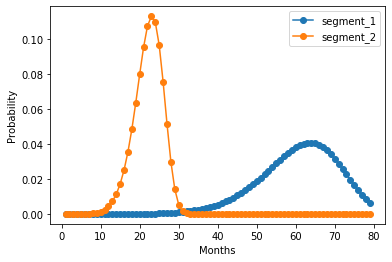

In [35]:
y=np.arange(1,80)

params = Model_2C.params
c, lmbda1, lmbda2 = np.exp(params[9:12])
beta = params[0:9]        
x = X[:,1:]
exp = np.exp(params[12] + np.dot(beta,x.T))
# p = exp/(1+exp)


Ft1 = spst.weibull_min.cdf(y, c=c,scale=1/lmbda1)
Ft1_m1 = spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda1)   
Ft2 = spst.weibull_min.cdf(y, c=c,scale=1/lmbda2)
Ft2_m1 = spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda2)
 
    
#segment 1: 
plt.plot(y,Ft1-Ft1_m1,marker="o", label = "segment_1")
plt.plot(y,Ft2-Ft2_m1,marker="o", label = "segment_2")
# plt.plot(y,(Ft1-Ft1_m1)*p+(Ft2-Ft2_m1)*(1-p),marker="o", label="overall")
plt.legend()
plt.xlabel("Months")
plt.ylabel("Probability")
print("C for Weibull model = ", c)
print("Lambda for Weibull model = ", lmbda1)
print("Lambda for Weibull model = ", lmbda2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in true_divide



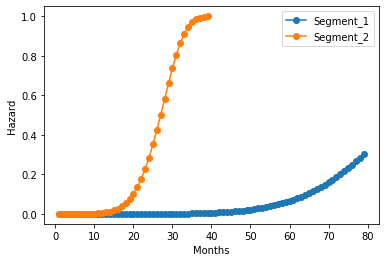

In [36]:
plt.plot(y,(Ft1-Ft1_m1)/(1-Ft1_m1),marker="o", label = "Segment_1")
plt.plot(y,(Ft2-Ft2_m1)/(1-Ft2_m1),marker="o", label = "Segment_2")
plt.xlabel("Months")
plt.ylabel("Hazard")
plt.legend()
plt.show()

In [ ]:
data1['Dependents'] = data1['Dependents'].apply(lambda x: int(0) if x == "No" else int(1))

In [ ]:
data1['OnlineSecurity'] = data1['OnlineSecurity'].apply(lambda x: int(0) if x == "No" else int(1))

In [ ]:
data1['OnlineBackup'] = data1['OnlineBackup'].apply(lambda x: int(0) if x == "No" else int(1))
data1['DeviceProtection'] = data1['DeviceProtection'].apply(lambda x: int(0) if x == "No" else int(1))

In [ ]:
data1['TechSupport'] = data1['TechSupport'].apply(lambda x: int(0) if x == "No" else int(1))

In [ ]:
data2={}
data2[1] = data1[data1["Churn"] == "Yes"][["SeniorCitizen", "Partner"]].values
data2[0]= data1[data1["Churn"] == "No"][["SeniorCitizen", "Partner"]].values[:len(data2[1])]


#Add intercept variable
Ones0=np.ones(data2[0].shape[0])
Ones0=np.expand_dims(Ones0, axis=1)

Ones1=np.ones(data2[1].shape[0])
Ones1=np.expand_dims(Ones1, axis=1)

data2[0]=np.append(data2[0],Ones0,axis=1)
data2[1]=np.append(data2[1],Ones1,axis=1)